# RQ8: Does positional encoding improve the performance of the model?

- Edit model
- Train model
- Evaluate model
- Compare with RQ1

In [8]:
import pickle

value_scores = {
    "attr_ids": {
        "t_score": [0.99],
        "v_score": [0.43],
        "label": "Attribute Access"
    },
    "num_ids": {
        "t_score": [0.67],
        "v_score": [0.6],
        "label": "Numeric Constant"
    },
    "name_ids": {
        "t_score": [0.92],
        "v_score": [0.56],
        "label": "Variable Name/Module Name"
    },
    "param_ids": {
        "t_score": [0.92],
        "v_score": [0.59],
        "label": "Function Parameter Name"
    },
    "string_ids": {
        "t_score": [0.84],
        "v_score": [0.13],
        "label": "Strings"
    }
}
type_scores = {
    "call_ids": {
        "score": [0.45],
        "label": "Function Call"
    },
    "assign_ids": {
        "score": [0.53],
        "label": "Assignment"
    },
    "return_ids": {
        "score": [0.59],
        "label": "Return"
    },
    "list_ids": {
        "score": [0.27],
        "label": "List"
    },
    "dict_ids": {
        "score": [0.19],
        "label": "Dictionary"
    },
    "raise_ids": {
        "score": [0.78],
        "label": "Raise"
    }
}

with open("rq8/scores.pkl", "wb") as fout:
    pickle.dump({"value_scores": value_scores, "type_scores": type_scores}, fout)


In [3]:
rq8 = pickle.load(open("rq8/scores.pkl", "rb"))
rq1 = pickle.load(open("rq1/scores.pkl", "rb"))

In [4]:
print("Score comparison: \t{}\t{}".format("Baseline", "Model with Positional Encoding"))
for key in rq1["value_scores"]:
    print("{}".format(key))
    for key2 in rq1["value_scores"][key]:
        if key2 == "label":
            continue
        print("\t{}\t\t{}\t\t\t{}".format(key2, rq1["value_scores"][key][key2][-1], rq8["value_scores"][key][key2][0]))
for key in rq1["type_scores"]:
    print("{}".format(key))
    for key2 in rq1["type_scores"][key]:
        if key2 == "label":
            continue
        print("\t{}\t\t{}\t\t\t{}".format(key2, rq1["type_scores"][key][key2][-1], rq8["type_scores"][key][key2][0]))

Score comparison: 	Baseline	Model with Positional Encoding
attr_ids
	t_score		0.99			0.99
	v_score		0.49			0.43
num_ids
	t_score		0.73			0.67
	v_score		0.62			0.6
name_ids
	t_score		0.93			0.92
	v_score		0.6			0.56
param_ids
	t_score		0.92			0.92
	v_score		0.6			0.59
string_ids
	t_score		0.87			0.84
	v_score		0.16			0.13
call_ids
	score		0.47			0.45
assign_ids
	score		0.57			0.53
return_ids
	score		0.63			0.59
list_ids
	score		0.31			0.27
dict_ids
	score		0.21			0.19
raise_ids
	score		0.81			0.78


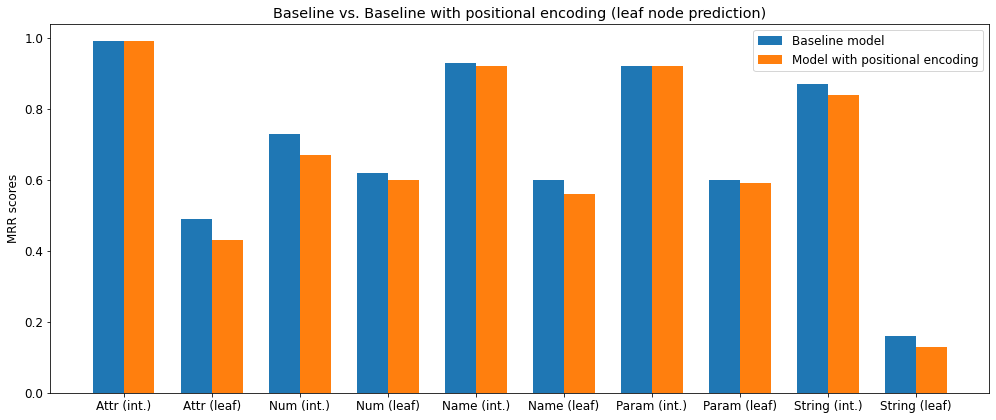

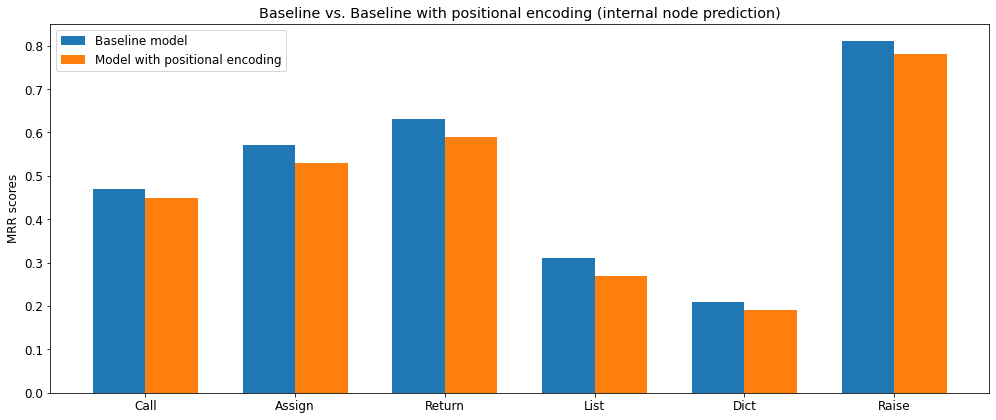

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'font.size': 12})
rcParams["figure.figsize"] = (14,6)

rq8_value_scores = []
rq8_type_scores = []

for key, value in value_scores.items():
    rq8_value_scores.append(value["t_score"][0])
    rq8_value_scores.append(value["v_score"][0])
for key, value in type_scores.items():
    rq8_type_scores.append(value["score"][0])

rq1_scores_file = pickle.load(open("rq1/scores.pkl", "rb"))
rq1_value_scores = []
rq1_type_scores = []
rq1_value_scores.append(rq1_scores_file["value_scores"]["attr_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["attr_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["num_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["num_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["name_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["name_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["param_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["param_ids"]["v_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["string_ids"]["t_score"][-1])
rq1_value_scores.append(rq1_scores_file["value_scores"]["string_ids"]["v_score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["call_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["assign_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["return_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["list_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["dict_ids"]["score"][-1])
rq1_type_scores.append(rq1_scores_file["type_scores"]["raise_ids"]["score"][-1])

value_labels = [
    "Attr (int.)", 
    "Attr (leaf)", 
    "Num (int.)", 
    "Num (leaf)", 
    "Name (int.)", 
    "Name (leaf)", 
    "Param (int.)", 
    "Param (leaf)", 
    "String (int.)", 
    "String (leaf)"
]

type_labels = [
    "Call",
    "Assign",
    "Return",
    "List",
    "Dict",
    "Raise"
]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, rq1_value_scores, width, label="Baseline model")
r2 = ax.bar(x + width/2, rq8_value_scores, width, label="Model with positional encoding")

ax.set_ylabel("MRR scores")
ax.set_title("Baseline vs. Baseline with positional encoding (leaf node prediction)")
ax.set_xticks(x)
ax.set_xticklabels(value_labels)
ax.legend()

fig.tight_layout()

plt.show()

x = np.arange(len(type_labels))
width = 0.35
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, rq1_type_scores, width, label="Baseline model")
r2 = ax.bar(x + width/2, rq8_type_scores, width, label="Model with positional encoding")

ax.set_ylabel("MRR scores")
ax.set_title("Baseline vs. Baseline with positional encoding (internal node prediction)")
ax.set_xticks(x)
ax.set_xticklabels(type_labels)
ax.legend()

fig.tight_layout()

plt.show()